In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [4]:
# Load dataset
iris = datasets.load_iris()

In [5]:
X = iris.data

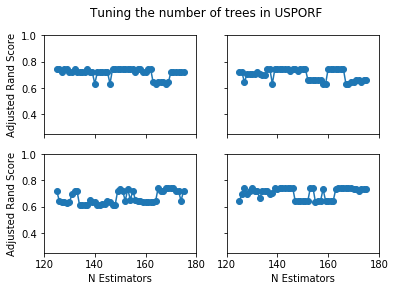

In [36]:
ax = [1,2]
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
plt.suptitle('Tuning the number of trees in USPORF')

for ax in axs.flat:
    score = []
    for i in range(125,176):
        clf = UnsupervisedRandomForest(n_estimators = i, projection_matrix="RerF", random_state=0)
        clf.fit(X)
        sim_mat = clf.transform()
        cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
        predict_labels = cluster.fit_predict(sim_mat)
        score.append(adjusted_rand_score(iris.target, predict_labels))

    ax.plot(list(range(125,176)),score,'-o')
    ax.axis([120, 180, 0.25, 1])
    ax.set(ylabel='Adjusted Rand Score',xlabel='N Estimators')
    ax.label_outer()
